In [1]:
import numpy as np
import sympy as smp
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import PillowWriter
import scienceplots
plt.style.use(['science', 'notebook' , 'grid'])

Position confined to some 1D path: $x=x(\theta)$ and $y=y(\theta)$ A few examples

* Parabola: $x = \theta$ and $y=\theta^2$
* Simple Pendulum: $x = \cos(\theta)$ and $y=\sin(\theta)$
* Tautochrone: $x = \sin(2\theta) + 2\theta$ and $y=1-\cos(2 \theta)$
* Many more ...
    

Kinetic Energy: $ T = \frac{1}{2}m (\dot{x}^2 + \dot{y}^2) $

Potential Energy: $ V = mgy $

The Lagrangian: $L = T- V $

Lagranges Equation: $\frac{dL}{d\theta} - \frac{d}{dt} \frac{dL}{d\dot{\theta}} = 0$

Define variables

In [2]:
t, m, g = smp.symbols('t m g')
theta = smp.symbols(r'\theta', cls= smp.Function)
theta = theta(t)
theta_d = smp.diff(theta, t)
theta_dd = smp.diff(theta_d, t)

In [3]:
theta_dd

Derivative(\theta(t), (t, 2))

Make sure $x$ and $y$ are functions of $\theta$

In [4]:
x, y = smp.symbols('x y', cls=smp.Function)
x = x(theta)
y = y(theta)

Define $x$ and $y$

In [5]:
path='simp'
if path=='simp':
    x = smp.cos(theta)
    y = smp.sin(theta)
    x_f = smp.lambdify(theta, x)
    y_f = smp.lambdify(theta, y)
if path=='parab':
    x = theta
    y = theta**2
    x_f = smp.lambdify(theta, x)
    y_f = smp.lambdify(theta, y)
if path=='taut':
    x = smp.sin(2*theta) + 2*theta
    y = 1 - smp.cos(2*theta)
    x_f = smp.lambdify(theta, x)
    y_f = smp.lambdify(theta, y)

Define $T$, $V$, and $L$

In [6]:
T = 1/2 * m * (smp.diff(x,t)**2 + smp.diff(y,t)**2)
V = m*g*y
L = T-V

In [7]:
L

-g*m*sin(\theta(t)) + 0.5*m*(sin(\theta(t))**2*Derivative(\theta(t), t)**2 + cos(\theta(t))**2*Derivative(\theta(t), t)**2)

Compute $\frac{dL}{d\theta} - \frac{d}{dt} \frac{dL}{d\dot{\theta}}$ (which is equal to zero:Lagranges equation)

In [8]:
L_equation = smp.diff(L, theta) - smp.diff(smp.diff(L, theta_d), t)
L_equation = L_equation.simplify()
L_equation

-1.0*m*(g*cos(\theta(t)) + Derivative(\theta(t), (t, 2)))

Solve for $d^2 \theta / dt^2 $ so we can solve it with an ODE solver. Our system of equations will then be

$$ \frac{d \theta}{dt} = \omega$$
$$\frac{d \omega}{dt} = \frac{d^2 \theta}{dt^2} =  \text{whatever is returned} $$

In [9]:
omega = theta_d
omega_d = smp.solve(L_equation, theta_dd)[0]
omega

Derivative(\theta(t), t)

Convert this into a numpy expression:

In [10]:
omega_f = smp.lambdify(theta_d, omega)
omega_d_f = smp.lambdify((g, theta, theta_d), omega_d)

$S = (\theta, \omega) $

Create ODE

In [11]:
S = smp.symbols('S', cls = smp.Function)
S = (theta, theta_d)
def dSdt(S, t):
    return [
        omega_f(S[1]), #dtheta/dt
        omega_d_f(g, S[0], S[1]) #domega/dt
    ]

Define initial conditions for $\theta$ and $\omega$

In [12]:
y0_1 = [np.pi/4, 0] #For particle 1
y0_2 = [np.pi/3, 0] #For particle 2
y0_3 = [np.pi/2.1, 0] #For particle 3

Solve

In [13]:
t = np.linspace(0, 20, 1000)
g = 9.81
particle_1 = odeint(dSdt, y0_1 , t=t)
particle_2 = odeint(dSdt, y0_2 , t=t)
particle_3 = odeint(dSdt, y0_3 , t=t)

Plot

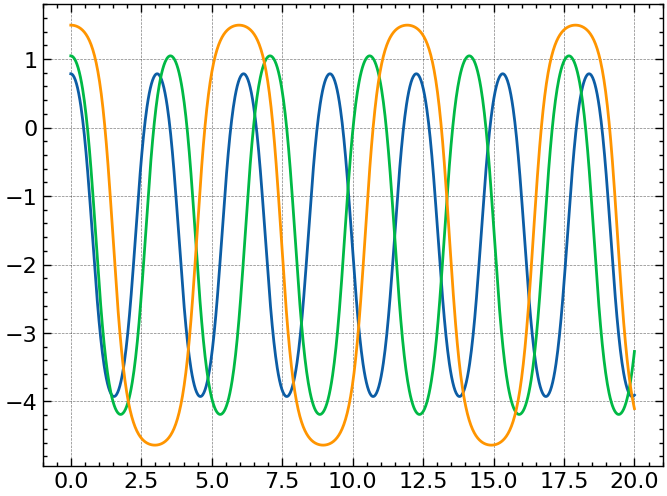

In [14]:
plt.plot(t, particle_1.T[0])
plt.plot(t, particle_2.T[0])
plt.plot(t, particle_3.T[0])

In [15]:
def get_xy(theta):
    return x_f(theta), y_f(theta)

In [16]:
x1, y1 = get_xy(particle_1.T[0])
x2, y2 = get_xy(particle_2.T[0])
x3, y3 = get_xy(particle_3.T[0])

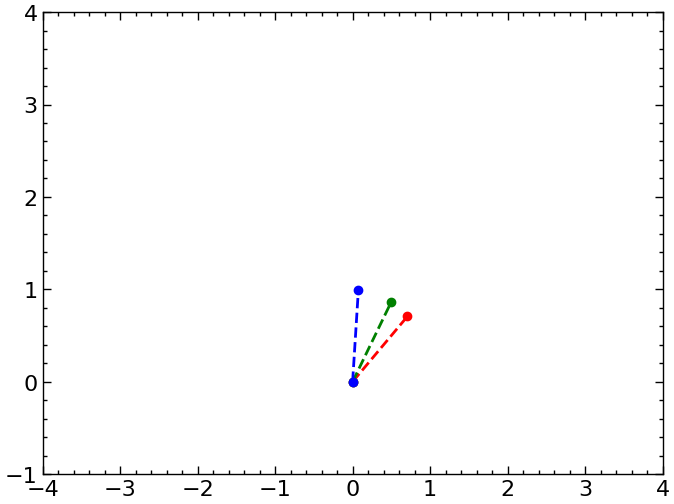

In [17]:
def animate(i):
    ln1.set_data([0, x1[i]], [0, y1[i]])
    ln2.set_data([0, x2[i]], [0, y2[i]])
    ln3.set_data([0, x3[i]], [0, y3[i]])
    
fig, ax = plt.subplots(1,1)
ax.grid()
ln1, = plt.plot([], [], 'ro--')
ln2, = plt.plot([], [], 'go--')
ln3, = plt.plot([], [], 'bo--')
ax.set_ylim(-1, 4)
ax.set_xlim(-4,4)
ani = animation.FuncAnimation(fig, animate, frames=1000, interval=50)
ani.save('Pendulum_Motion.gif',writer='pillow',fps=50)